In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd 
import numpy as np
import seaborn as sns

plt.rcParams['axes.titlesize'] = 'large'

#### Descriptive Statistics

In [48]:
# Read the combined dataset and print the contents.
data = pd.read_csv('ad-clean-data.csv', index_col=False,)
data.head()

,MCI,AD,Age,MMSE,ADAS11,ADAS13,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,...,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
0,0,1,72.400000,21.0,12.67,22.67,1214750.869,2706.384202,3609.184822,291.551435,...,3592.236503,5822.857187,6127.523393,3853.724849,4152.741615,473.947627,490.895945,232505.2075,254897.6692,10233.25360
1,0,1,73.396578,22.0,12.67,22.67,1214750.869,2996.197727,3635.575129,234.388234,...,3260.574014,5330.552084,5739.352444,3980.588189,4250.580968,420.033343,238.099130,227700.1954,247076.2894,10115.60241
2,0,1,74.415058,19.0,33.67,48.67,1214750.869,3072.165927,4002.862747,191.821471,...,2756.325428,5240.030635,5520.106101,4061.094265,4344.998101,424.949035,334.680108,212094.4008,235671.8185,10231.82172
3,0,1,82.301027,25.0,7.00,13.00,1214750.869,3022.121600,2896.213470,195.010691,...,2833.204993,5583.160444,5788.291668,4031.563103,4246.814859,552.385195,454.988672,238270.3091,244937.4547,10110.30317
4,0,1,82.793840,25.0,10.67,15.67,1214750.869,2926.762714,2879.883925,199.507404,...,2521.751782,5833.138606,5973.556932,4044.113197,4284.285225,433.465267,486.449200,229719.9112,234663.5521,10331.10389


In [50]:
#basic descriptive statistics
data = data.drop(['MCI'], axis=1)
data.describe()

,AD,Age,MMSE,ADAS11,ADAS13,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,...,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
count,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000,2366.000000,2366.000000,2366.000000,2366.000000,...,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000
mean,0.430685,75.955417,26.029923,12.171948,18.575838,1214750.869,2156.941977,2409.155355,323.726197,320.030522,...,3826.436217,6346.923442,6535.781711,4173.481078,4363.690877,431.351124,425.913153,253651.943347,253278.682319,9799.282409
std,0.495277,6.626198,4.480089,9.710909,13.618586,0.000,730.930763,667.719350,91.697724,90.902078,...,709.271763,713.083457,715.145499,341.198536,359.463713,118.417026,109.732977,16322.441790,15960.186818,1170.656330
min,0.000000,55.100000,2.000000,0.000000,0.000000,1214750.869,400.381584,1064.293134,0.000000,0.000000,...,295.205715,1736.965469,2102.574334,3131.753915,3129.296019,134.919627,145.684738,176034.555500,173941.256600,4476.289516
25%,0.000000,71.900000,23.000000,5.000000,8.000000,1214750.869,1591.037991,1943.052145,269.125721,267.934324,...,3419.404171,5940.791642,6135.742540,3943.726349,4126.498002,346.868827,346.734867,243957.153175,244213.247000,9024.134585
50%,0.000000,75.900000,28.000000,9.000000,14.000000,1214750.869,2105.761463,2285.483718,329.650724,319.751446,...,3815.600424,6388.697468,6577.886326,4165.598703,4353.139423,420.495820,422.629811,255146.523050,254925.338450,9803.294385
75%,1.000000,80.400000,30.000000,18.000000,28.330000,1214750.869,2654.325422,2727.731224,382.099262,371.781768,...,4218.779009,6813.088219,6979.311794,4384.241721,4580.191851,503.229169,496.142965,265095.560825,263813.801625,10571.230390
max,1.000000,95.620534,30.000000,66.000000,94.135797,1214750.869,5339.949837,6808.261084,671.328887,839.267903,...,7624.914581,9895.594977,9980.384681,5790.920872,6149.385048,930.204999,863.066283,293396.840100,299183.521400,14337.272370


The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew. 

In [51]:
data.skew()

AD                            0.280142
Age                          -0.240639
MMSE                         -1.462474
ADAS11                        1.364718
ADAS13                        1.036058
TotalICVolume                 0.000000
3rdVentricle                  0.458567
4thVentricle                  1.471311
RightAccumbensArea           -0.269857
LeftAccumbensArea             0.273702
RightAmygdala                -0.345307
LeftAmygdala                 -0.353636
Brainstem.1                   0.316525
RightCaudate                  2.222298
LeftCaudate                   2.155399
RightCelebellumExterior      -0.123390
LeftCerebellumExterior       -0.176039
RightCerebellumWhiteMatter    1.231019
LeftCerebellumWhiteMatter     1.277795
RightCerebralWhiteMatter      0.518172
LeftCerebralWhiteMatter       0.662019
RightHippocampus             -0.309332
LeftHippocampus              -0.161269
RightInfLatVentricle          1.904603
LeftInflatVentricle           1.608211
RightLateralVentricle    

1019 observations indicating a patient has AD and 1347 show normal cognition

In [14]:
labels_split = data.groupby('AD', axis=0)
pd.DataFrame(labels_split.size(), columns=['# of observations'])

,# of observations
AD,
0,1347
1,1019


In [52]:
y = data.AD                      
list = ['AD']
data = data.drop(list,axis = 1 )
data.head()

,Age,MMSE,ADAS11,ADAS13,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,...,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
0,72.400000,21.0,12.67,22.67,1214750.869,2706.384202,3609.184822,291.551435,252.005358,835.108228,...,3592.236503,5822.857187,6127.523393,3853.724849,4152.741615,473.947627,490.895945,232505.2075,254897.6692,10233.25360
1,73.396578,22.0,12.67,22.67,1214750.869,2996.197727,3635.575129,234.388234,238.099130,800.650949,...,3260.574014,5330.552084,5739.352444,3980.588189,4250.580968,420.033343,238.099130,227700.1954,247076.2894,10115.60241
2,74.415058,19.0,33.67,48.67,1214750.869,3072.165927,4002.862747,191.821471,172.981862,750.158965,...,2756.325428,5240.030635,5520.106101,4061.094265,4344.998101,424.949035,334.680108,212094.4008,235671.8185,10231.82172
3,82.301027,25.0,7.00,13.00,1214750.869,3022.121600,2896.213470,195.010691,142.122747,919.989054,...,2833.204993,5583.160444,5788.291668,4031.563103,4246.814859,552.385195,454.988672,238270.3091,244937.4547,10110.30317
4,82.793840,25.0,10.67,15.67,1214750.869,2926.762714,2879.883925,199.507404,20.386822,911.846955,...,2521.751782,5833.138606,5973.556932,4044.113197,4284.285225,433.465267,486.449200,229719.9112,234663.5521,10331.10389


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [55]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [5.77985380e-02 8.92861220e+02 8.94582291e+03 1.29354055e+04
 3.42645325e-21 4.72315499e+04 4.47233541e+02 3.21701241e+03
 2.45444735e+03 2.44267784e+04 2.63030876e+04 2.32269591e+01
 4.21898832e+04 2.98240677e+04 4.86824612e+02 2.05934798e+02
 2.28078167e+04 2.87208103e+04 1.11827926e+04 8.61625070e+03
 5.42965231e+04 6.32711504e+04 1.96564427e+05 1.68180094e+05
 1.28775884e+06 1.60365488e+06 2.83252688e+02 9.97035396e+00
 3.97275640e+03 3.95575488e+03 1.12659107e+04 1.02143515e+04
 8.29767787e+00 1.83317927e+01 3.72083227e+03 2.75231383e+03
 2.56665391e+05 2.85006030e+05 7.57237989e-01]
Feature list: Index(['Age', 'MMSE', 'ADAS11', 'ADAS13', 'TotalICVolume', '3rdVentricle',
       '4thVentricle', 'RightAccumbensArea', 'LeftAccumbensArea',
       'RightAmygdala', 'LeftAmygdala', 'Brainstem.1', 'RightCaudate',
       'LeftCaudate', 'RightCelebellumExterior', 'LeftCerebellumExterior',
       'RightCerebellumWhiteMatter', 'LeftCerebellumWhiteMatter',
       'RightCerebralWhit

In [20]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Create the RFE object and rank each pixel
rf_1 = RandomForestClassifier()      
rfe = RFE(estimator=rf_1, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train, y_train)

In [21]:
print('Chosen best 10 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 10 feature by rfe: Index(['Age', 'MMSE', 'ADAS11', 'ADAS13', 'RightAmygdala', 'LeftAmygdala',
       'RightHippocampus', 'LeftHippocampus', 'RightInfLatVentricle',
       'LeftInflatVentricle'],
      dtype='object')


### Neuro Features

In [72]:
data = pd.read_csv('data/Neuro_AD_NC.csv', index_col=False)

In [73]:
y = data.AD                      
list = ['AD', 'MCI']
data = data.drop(list,axis = 1 )
data.head()

,MMSE,ADAS11,ADAS13
0,22.0,26.67,38.67
1,12.0,38.33,48.33
2,30.0,4.33,9.33
3,30.0,3.33,5.33
4,29.0,4.00,9.00


/var/folders/qg/_7pvsvx17nb_kxf7rphmscvc0000gn/T/ipykernel_25418/1944436110.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:title={'center':'AD Feature Correlation'}>

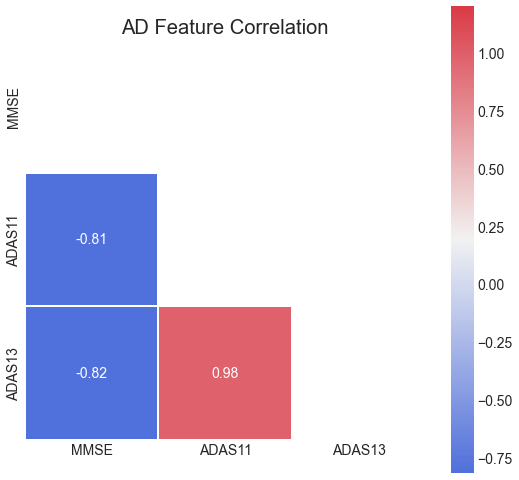

In [74]:
# # plot correlation matrix
plt.style.use('fivethirtyeight')
sns.set_style("white")
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
_, ax = plt.subplots(figsize=(8, 8))
plt.title('AD Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, ax=ax,annot=True, fmt='.2g',linewidths=2)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


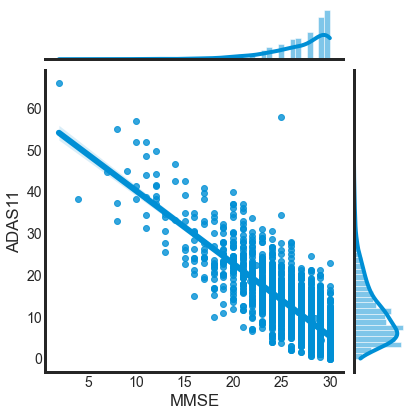

In [75]:
sns.jointplot(data.loc[:,'MMSE'], data.loc[:,'ADAS11'], kind="reg", palette='Reds_r')

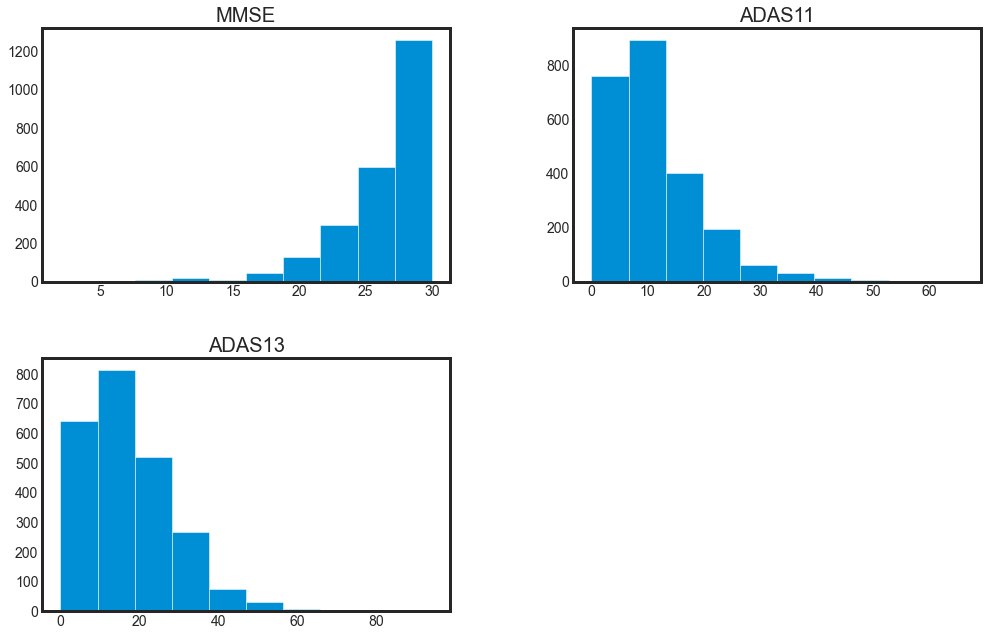

In [76]:
neuro_hist = data.hist(bins=10, figsize=(15, 10), grid=False)

### MRI Features

In [68]:
data = pd.read_csv('data/sMRI_AD_NC.csv', index_col=False)
# data = data.drop('AD', axis=1)
data

,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,LeftAmygdala,Brainstem.1,RightCaudate,LeftCaudate,...,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis,AD,MCI
0,1214750.869,2706.384202,3609.184822,291.551435,252.005358,835.108228,912.182725,17367.08342,6505.632312,5574.584495,...,6127.523393,3853.724849,4152.741615,473.947627,490.895945,232505.2075,254897.6692,10233.253600,1,0
1,1214750.869,2996.197727,3635.575129,234.388234,238.099130,800.650949,819.406019,17141.13145,7376.158593,5921.186362,...,5739.352444,3980.588189,4250.580968,420.033343,238.099130,227700.1954,247076.2894,10115.602410,1,0
2,1214750.869,3072.165927,4002.862747,191.821471,172.981862,750.158965,817.860661,17073.72283,8844.239201,6858.826533,...,5520.106101,4061.094265,4344.998101,424.949035,334.680108,212094.4008,235671.8185,10231.821720,1,0
3,1214750.869,3022.121600,2896.213470,195.010691,142.122747,919.989054,1123.161465,16199.16377,3109.397590,3475.042637,...,5788.291668,4031.563103,4246.814859,552.385195,454.988672,238270.3091,244937.4547,10110.303170,1,0
4,1214750.869,2926.762714,2879.883925,199.507404,20.386822,911.846955,958.616723,16196.73059,2900.270747,3124.198730,...,5973.556932,4044.113197,4284.285225,433.465267,486.449200,229719.9112,234663.5521,10331.103890,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,1214750.869,1574.529446,1756.134023,219.832201,186.277881,783.152216,622.390572,18890.33431,5113.341857,4379.913591,...,5570.297482,4383.371836,4703.773530,421.064654,491.631538,236170.4441,235773.5872,9945.537770,1,0
2362,1214750.869,1687.098706,1900.014736,315.703079,264.212950,785.586732,726.947879,19741.10287,5760.904961,5035.116334,...,6376.661211,3768.826261,4040.284539,278.607001,320.436693,260537.7335,263541.3566,10260.350070,1,0
2363,1214750.869,3897.497914,3170.369046,348.100232,331.390590,1136.878336,1099.618949,16413.33070,4192.978343,4742.735924,...,6613.074111,4180.108806,4264.902452,411.098694,520.282189,239684.5495,244014.6299,8832.965541,0,0
2364,1214750.869,2406.687517,2577.421885,286.750805,294.593408,1126.900916,1076.690228,19722.07312,4100.419322,3726.588581,...,6176.816066,4131.609445,4335.787556,471.998496,492.010655,248666.2235,245058.8064,9273.111774,1,0


In [69]:
y = data.AD                       
list = ['AD']
data = data.drop(list,axis = 1 )
data.head()

,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,LeftAmygdala,Brainstem.1,RightCaudate,LeftCaudate,...,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis,MCI
0,1214750.869,2706.384202,3609.184822,291.551435,252.005358,835.108228,912.182725,17367.08342,6505.632312,5574.584495,...,5822.857187,6127.523393,3853.724849,4152.741615,473.947627,490.895945,232505.2075,254897.6692,10233.25360,0
1,1214750.869,2996.197727,3635.575129,234.388234,238.099130,800.650949,819.406019,17141.13145,7376.158593,5921.186362,...,5330.552084,5739.352444,3980.588189,4250.580968,420.033343,238.099130,227700.1954,247076.2894,10115.60241,0
2,1214750.869,3072.165927,4002.862747,191.821471,172.981862,750.158965,817.860661,17073.72283,8844.239201,6858.826533,...,5240.030635,5520.106101,4061.094265,4344.998101,424.949035,334.680108,212094.4008,235671.8185,10231.82172,0
3,1214750.869,3022.121600,2896.213470,195.010691,142.122747,919.989054,1123.161465,16199.16377,3109.397590,3475.042637,...,5583.160444,5788.291668,4031.563103,4246.814859,552.385195,454.988672,238270.3091,244937.4547,10110.30317,0
4,1214750.869,2926.762714,2879.883925,199.507404,20.386822,911.846955,958.616723,16196.73059,2900.270747,3124.198730,...,5833.138606,5973.556932,4044.113197,4284.285225,433.465267,486.449200,229719.9112,234663.5521,10331.10389,0


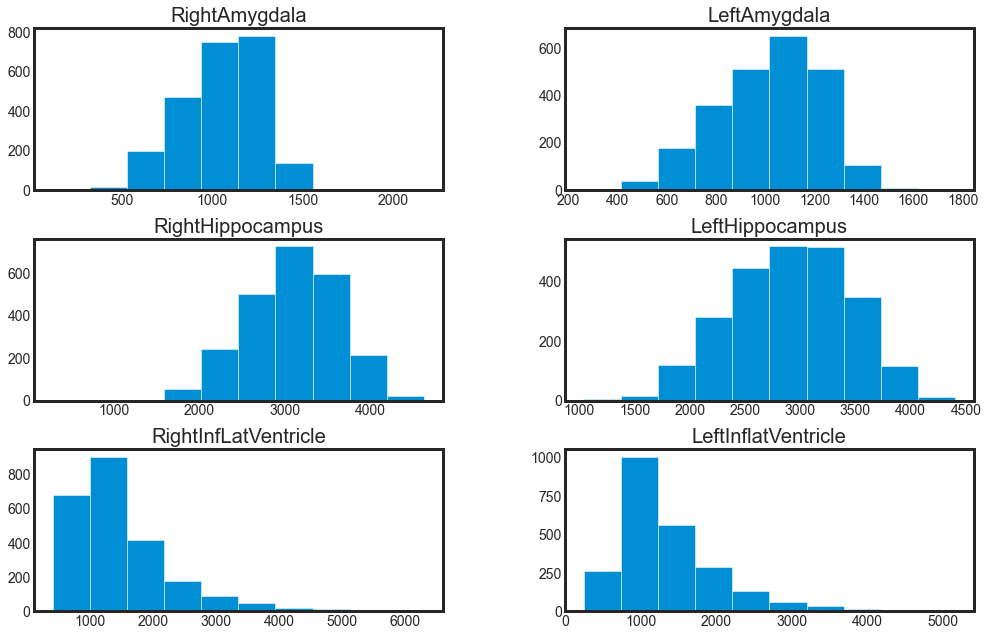

In [70]:
features_of_interest = data[['RightAmygdala', 'LeftAmygdala',
       'RightHippocampus', 'LeftHippocampus', 'RightInfLatVentricle',
       'LeftInflatVentricle']]
neuro_hist = features_of_interest.hist(bins=10, figsize=(15, 10), grid=False)

/var/folders/qg/_7pvsvx17nb_kxf7rphmscvc0000gn/T/ipykernel_25418/3008846186.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:title={'center':'AD Feature Correlation'}>

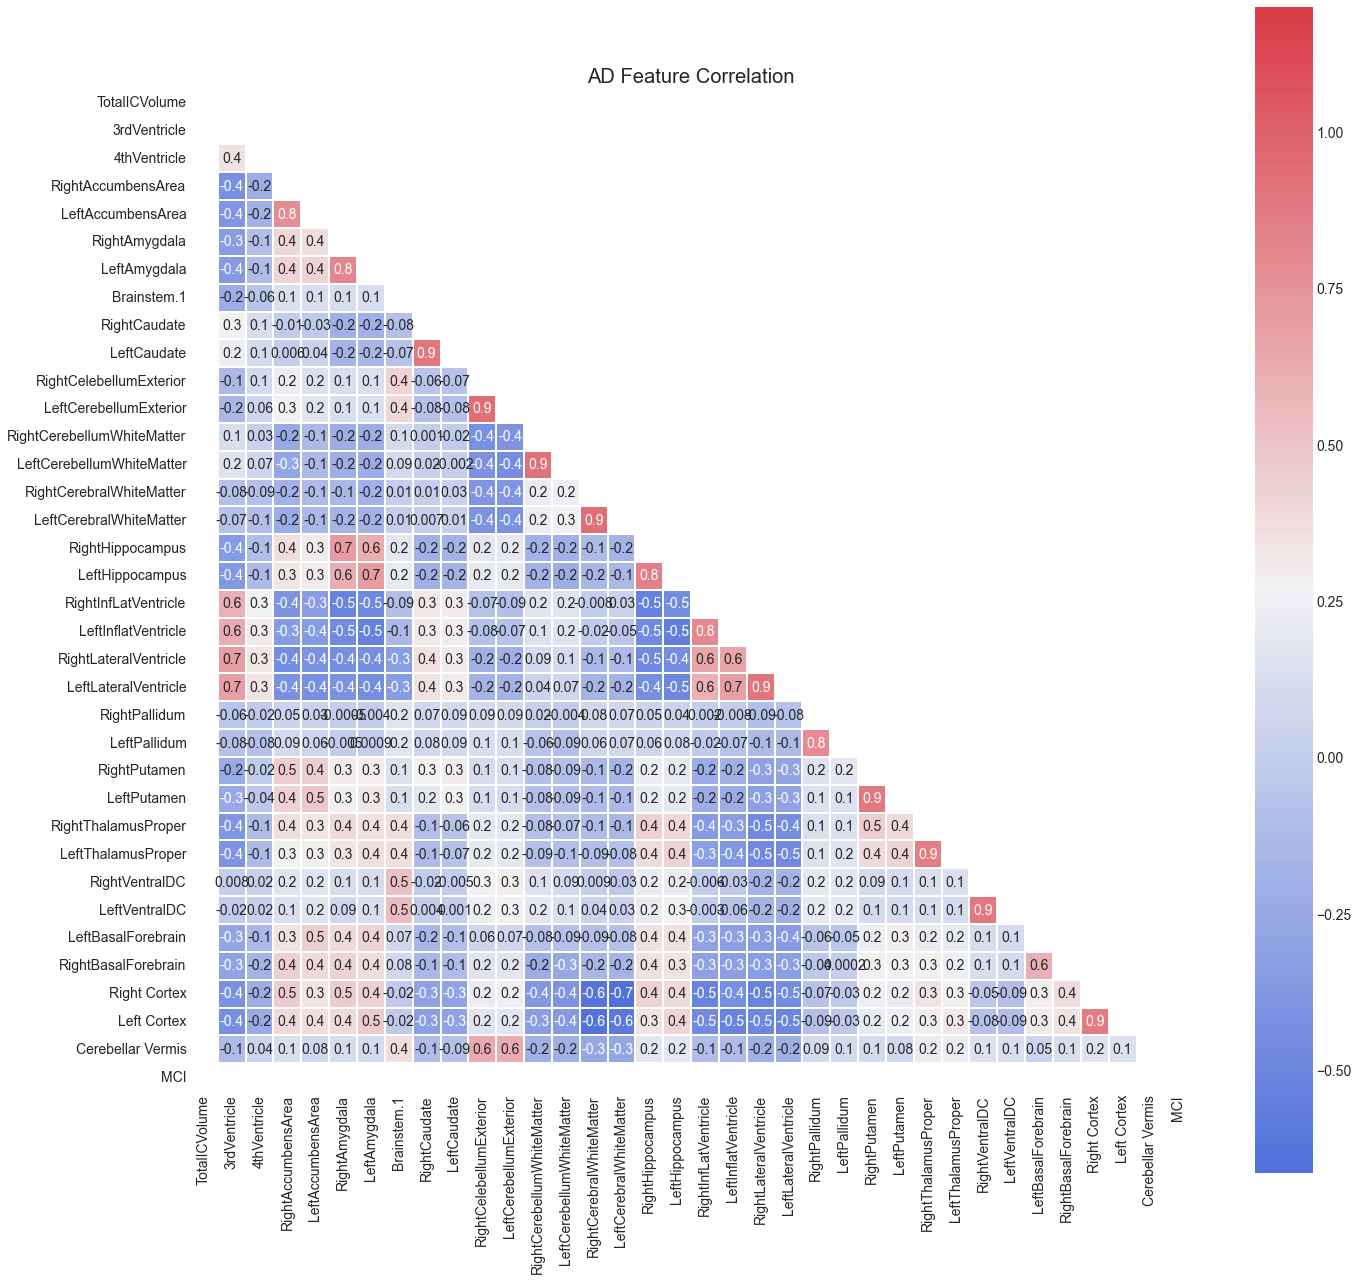

In [71]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

# data = data.drop('AD', axis=1)
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plot, ax = plt.subplots(figsize=(20, 20))
plt.title('AD Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.1',linewidths=2)